###  Barbara Karakyriakou

## Problem 1: Computing Class Grades

### Suppose you teach a class of 12 students.  At the end of the semester, you need to calculate a final grade for each student as well as some basic class statistics.  

Each student's grade is a combination of:   
1) An individual grade (randomly assigned between 75 and 90 points)  
2) A group project  
3) Class participation  

#### Note: Print your results after each step.


#### Step 1: Create a numpy array containing the individual grades for all 12 students in the course.  The grades should been randomly assigned integers in the range of 75 to 90 inclusive.  Your result should be a 1-D numpy array of length 12. (Hint: use random.randint())  

In [1]:
import numpy as np
np.random.seed(5)

# Your code here
stu_grades = np.random.randint(75,91,(12))
stu_grades

array([78, 89, 90, 88, 81, 81, 75, 84, 83, 79, 82, 89])

#### Step 2: Assign student groups by reshaping your 1-D numpy array to be a 2-D array with shape 4 rows x 3 columns.  Each row represents a group containing 3 students.

In [2]:
# Your code here
stu_groups = stu_grades.reshape(4,3)
stu_groups

array([[78, 89, 90],
       [88, 81, 81],
       [75, 84, 83],
       [79, 82, 89]])

#### Step 3: Assign group project grades to the students.  Add the following points to each student's grade: (Hint - think broadcasting)  
- Row 1 earned a grade worth 14 points.  
- Row 2 earned a grade worth 12 points.  
- Row 3 earned a grade worth 10 points.  
- Row 4 earned a grade worth 8 points.

In [3]:
# Array of project grades
proj_grades = np.array([[14,12,10,8]]).T

# Your code here
stu_proj = stu_groups + proj_grades
stu_proj

array([[ 92, 103, 104],
       [100,  93,  93],
       [ 85,  94,  93],
       [ 87,  90,  97]])

#### Step 4: Assign class participation grades to the students.  Multiply each student's grade by the following percentages:  
- Column 1 earned a grade worth 100%.
- Column 2 earned a grade worth 80%.
- Column 3 earned a grade worth 60%. 

In [4]:
# Array of participation grades
part_grades = np.array([1.0, 0.8, 0.6])

# Your code here
stu_part = stu_proj * part_grades
stu_part

array([[ 92. ,  82.4,  62.4],
       [100. ,  74.4,  55.8],
       [ 85. ,  75.2,  55.8],
       [ 87. ,  72. ,  58.2]])

#### Step 5: The first student listed in group 4 (last row, first column) did a particularly great job this semester.  Add 2 points to her grade.

In [5]:
# Your code here
a_stu = stu_part[3] # index row 4
a_stu[0] += 2 # index 1st student & add 2
final_grades = stu_part 
final_grades

array([[ 92. ,  82.4,  62.4],
       [100. ,  74.4,  55.8],
       [ 85. ,  75.2,  55.8],
       [ 89. ,  72. ,  58.2]])

#### Step 6: Compute the following class statistics:  
- the minimum grade  
- the maximum grade  
- the mean grade  

In [6]:
# Your code here

# Min grade
min_grade = final_grades.min()
print(min_grade)
# Max grade
max_grade =final_grades.max()
print(max_grade)
# Mean grade
mean_grade = final_grades.mean()
print(mean_grade)

55.8
100.0
75.18333333333334


## Problem 2: Run-Length Encoding

Throughout the course of this problem, we're going to explore the `random` module in the `numpy` library. We're also going to learn about the magic command `%pdoc`, how to write unit tests in Python, and other best practices that will be helpful for the rest of the semester and beyond. 

Before we get into the code, let's take a brief look at the Wikipedia page for run-length encoding: https://en.wikipedia.org/wiki/Run-length_encoding#Example

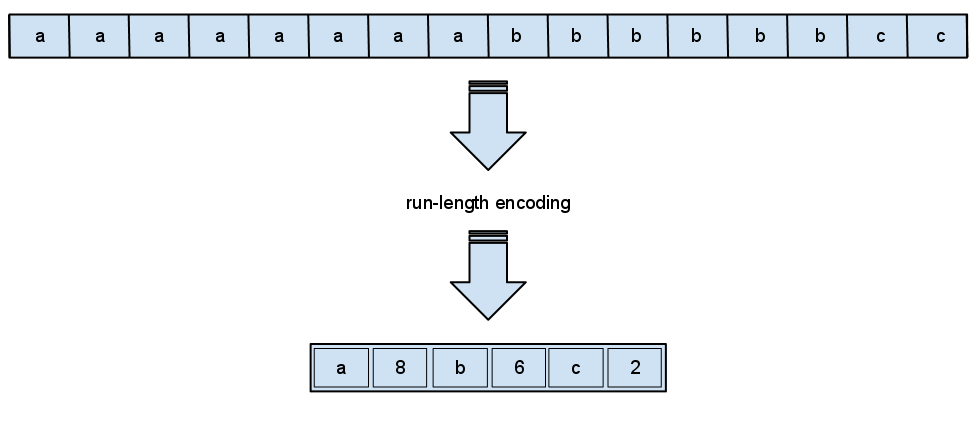

In [8]:
# This is one way to display an image in a Jupyter notebook!
from IPython.display import Image
Image('Run-lengthEncoding1.png')

Basically, run-length encoding can be thought of as one of the most basic forms of compression. Although it isn't very effective for datasets where the same value doesn't repeat very often, it has limited applications that can be very useful. For instance, we can record the results of a coin flip (as **H** or **T**) and use run-length encoding to compress the resulting string. **HHTTTTTTHTTTTHHH** becomes **H2T6H1T4H3**.

In [9]:
import numpy as np

After importing `numpy`, let's do some exploring. First, let's run the magic command `%pdoc` on the `numpy` library below. Per the documentation for [Jupyter notebooks](http://ipython.readthedocs.io/en/stable/interactive/magics.html), the stated functionality is: __"Print the docstring for an object."__ You'll notice that a screen pops up at the bottom of your window - feel free to click the "X" in the top right corner of that pop-up to close it when you're done reading. Executing the cell again will bring up the pop-up again.

In [10]:
%pdoc np

Looking briefly through the documentation for `numpy`, you'll see a general summary of what the library does. This information is also available in the [online documentation for NumPy](https://docs.scipy.org/doc/numpy-dev/index.html) but it's usually faster to use a magic command in your notebook than it is to run a Google search. Plus, you can keep coding in the upper half of your screen while the docstring pop-up is open. It's totally okay to use the online documentation if you prefer - but hopefully you're more comfortable with using magic commands now! 

This `%pdoc` command has a similar functionality to the `man` pages (manual pages) found on Unix systems. (If you have a Mac or Linux machine, open up your Terminal and type `man cd` to see a manual page for the `change directory` command as an example. Since you're using a Jupyter notebook, you likely typed `jupyter notebook` in your Terminal to get here - try running `man` on that as well!)

For this problem, we don't really need to read too much documentation about the `numpy` library itself; let's dive further into a specific module within the library. Run the below command on the `np.random` module and see what description comes up.

In [11]:
%pdoc np.random

This is where things get really interesting! The documentation for the `np.random` module gives us a list of functions in the module (organized by category in this particular docstring) as well as a brief description of what each function does. For this problem, we care about `np.random.choice` so let's dig deeper into what that does.

In [12]:
%pdoc np.random.choice

This is the final level of granularity that we'll examine. Notice that the docstring for `np.random.choice` is extremely detailed and specifies a number of important things:
- Parameters that the function accepts, with types and whether they are optional
- Return value(s), with types
- Potential errors and why they may occur
- Related functions in this module
- Example usage with different test cases

Before we dive into the weeds here, I want to note that `%pdoc` isn't the only way to access this documentation. You can get the exact same information in the [online documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html) for `np.random.choice` or by calling the built-in Python `help(np.random.choice)` function or by printing the docstring property on the function with `print(np.random.choice.__doc__)`. 

However, these approaches to getting the documentation will return the docstring in your standard output (as opposed to opening a pop-up in your notebook). There's no wrong approach; choose the one you prefer when investigating a library, module, or function that you're confused about.

In [13]:
# Notice that there are no parens!
print(type(np.random.choice))

<class 'builtin_function_or_method'>


Note that `np.random.choice` (without parens) refers to the function itself, whereas `np.random.choice()` is an invocation of said function. The invocation will fail if required arguments are not passed to it, but for the purposes of using `%pdoc` or `help()` or the `.__doc__` property, we want to refer to the function itself without parens.

In [14]:
# Uncomment and run to see documentation in your output
# help(np.random.choice)
# print np.random.choice.__doc__

# You can even run %pdoc on itself!
# %pdoc %pdoc
%pdoc?

Now let's look at the `np.random.choice` documentation. There are 4 parameters, 3 of which are optional:
- `a` : 1-D array specifying the range of possibilities
- `size` (optional) : tuple specifying output shape, e.g. (x, y) represents x trials of y samples each
- `replace` (optional) : boolean specifying sample replacement
- `p` (optional) : 1-D array specifying the probabilities of each possible outcome given in a

As an example, we're going to use `np.random.choice` to simulate 5 trials of 50 coin flips each. For the purposes of this problem, we're going to ignore the optional `replace` parameter.

In [15]:
np.random.choice(['H','T'], size=(5, 50), p=[0.5,0.5])

array([['T', 'T', 'H', 'H', 'H', 'T', 'H', 'H', 'T', 'H', 'H', 'H', 'T',
        'T', 'T', 'H', 'H', 'H', 'H', 'H', 'H', 'T', 'T', 'H', 'H', 'H',
        'T', 'T', 'H', 'T', 'H', 'T', 'T', 'T', 'H', 'T', 'T', 'T', 'H',
        'H', 'T', 'H', 'T', 'T', 'T', 'H', 'H', 'H', 'H', 'H'],
       ['T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'H', 'H', 'H', 'T',
        'T', 'H', 'H', 'H', 'H', 'T', 'H', 'T', 'H', 'T', 'T', 'T', 'H',
        'T', 'H', 'H', 'H', 'T', 'T', 'H', 'H', 'T', 'H', 'H', 'T', 'T',
        'H', 'T', 'H', 'T', 'H', 'T', 'T', 'H', 'H', 'H', 'T'],
       ['H', 'H', 'T', 'T', 'H', 'T', 'H', 'H', 'T', 'T', 'T', 'T', 'T',
        'T', 'T', 'T', 'T', 'T', 'H', 'H', 'H', 'H', 'H', 'T', 'H', 'H',
        'T', 'H', 'H', 'H', 'H', 'T', 'H', 'H', 'T', 'T', 'T', 'T', 'H',
        'T', 'T', 'H', 'T', 'T', 'T', 'H', 'T', 'H', 'T', 'H'],
       ['H', 'T', 'H', 'T', 'H', 'H', 'T', 'T', 'T', 'T', 'H', 'H', 'T',
        'T', 'T', 'T', 'H', 'H', 'H', 'H', 'H', 'H', 'T', 'H', 'H', 'H',
     

In the above function call, notice that we explicitly specify the values of `size` and `p`. We could also have omitted `p=[0.5,0.5]` from our function call, as the documentation for `np.random.choice` states that `p` is set to assume a uniform distribution by default - which corresponds perfectly to our 50-50 odds of flipping a coin.

## **ACTUAL CODING STARTS BELOW!**

1) Let's write a function called `coin_simulator()` that takes two arguments, `trials` and `samples`, and uses `np.random.choice` to simulate some number `t` of trials of some number `s` samples of coin flips. The function should return an array of arrays (2-D array) per above. Some basic scaffolding has been provided for you. Again, note that the docstring is directly accessible as a property of the function via `.__doc__`. This should be a relatively simple function to write.

In [16]:
def coin_simulator(trials, samples):
    """
    @param trials : int specifying number of trials to conduct
    @param samples : int specifying number of samples in a trial
    @return result : 2-D array specifying the results of all trials, e.g. [['H', 'T'], ['H', 'T']]
    """
    # Your code here
    return np.random.choice(['H','T'], size=(trials, samples)) # return a 2-D array with size #trials by #samples
    #pass

In [17]:
print(coin_simulator.__doc__)


    @param trials : int specifying number of trials to conduct
    @param samples : int specifying number of samples in a trial
    @return result : 2-D array specifying the results of all trials, e.g. [['H', 'T'], ['H', 'T']]
    


2a) Let's execute your function to make sure that it works. I've also defined some sample data below to help us test this function. If all goes well, the below cell should execute without any errors.

In [18]:
test_trials = 8
test_samples = 36
tosses = coin_simulator(test_trials, test_samples)
print(tosses)

[['T' 'T' 'T' 'T' 'H' 'H' 'H' 'H' 'T' 'T' 'H' 'T' 'H' 'H' 'H' 'T' 'H' 'T'
  'H' 'H' 'H' 'T' 'T' 'T' 'T' 'T' 'T' 'T' 'H' 'T' 'T' 'H' 'H' 'T' 'H' 'H']
 ['T' 'H' 'T' 'T' 'T' 'H' 'H' 'T' 'T' 'T' 'T' 'T' 'T' 'T' 'T' 'H' 'T' 'T'
  'T' 'T' 'H' 'T' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'T' 'T' 'T' 'T' 'T' 'T' 'H']
 ['T' 'H' 'H' 'H' 'T' 'H' 'H' 'T' 'T' 'T' 'T' 'H' 'H' 'T' 'H' 'T' 'H' 'H'
  'T' 'T' 'H' 'T' 'H' 'T' 'H' 'T' 'T' 'H' 'H' 'H' 'T' 'T' 'H' 'H' 'H' 'T']
 ['T' 'H' 'H' 'H' 'T' 'T' 'H' 'H' 'H' 'T' 'H' 'T' 'H' 'T' 'T' 'H' 'T' 'H'
  'T' 'T' 'T' 'T' 'T' 'H' 'H' 'T' 'T' 'T' 'H' 'T' 'T' 'T' 'T' 'H' 'H' 'H']
 ['H' 'T' 'T' 'T' 'H' 'H' 'H' 'T' 'T' 'H' 'H' 'H' 'T' 'T' 'T' 'T' 'T' 'H'
  'H' 'H' 'T' 'T' 'T' 'H' 'T' 'H' 'H' 'T' 'H' 'H' 'T' 'H' 'H' 'H' 'H' 'H']
 ['H' 'H' 'H' 'T' 'T' 'T' 'H' 'H' 'T' 'H' 'T' 'H' 'T' 'T' 'T' 'H' 'H' 'H'
  'T' 'H' 'T' 'H' 'H' 'T' 'H' 'H' 'H' 'T' 'H' 'T' 'T' 'T' 'T' 'H' 'H' 'T']
 ['H' 'T' 'T' 'H' 'H' 'T' 'H' 'H' 'T' 'T' 'T' 'H' 'H' 'H' 'H' 'H' 'T' 'T'
  'T' 'T' 'H' 'H' 'T' 'H' 'T' 'H

2b) Let's engage in some more rigorous testing to ensure that the shape of our data is correct. In a professional development setting, software engineers and data scientists write a lot of code to test their functions. We can write individual tests for each function that are caled unit tests. Depending on your engineering methodology, 50% of your code may end up being test code! 

Here, we'll use Python's native `assert` to write simple unit tests that check the shape of our `tosses` result from `coin_simulator()`. The way that `assert` works is that we make a claim: if the statement is `False` we'll trigger an `AssertionError` (with a custom message), otherwise the cell will execute as intended.

In [19]:
# Test that `tosses` is of length `test_trials`
assert len(tosses) == test_trials, 'Error: incorrect number of trials.'

In [20]:
# Test that each trial in `tosses` is of length `test_samples`
for i in range(len(tosses)):
    assert len(tosses[i]) == test_samples, 'Error: incorrect number of samples in trial %d.' % i

2c) Let's write another function called `run_length_encoding()` that has one parameter, a 2-D array of tosses that is similar to the result of our testing `coin_simulator()` above. Your function should return a 2-D array of integer run-lengths. For the purposes of this exercise, we'll ignore whether a specific run-length corresponds to "H" or "T" - as you'll see in the next step, what we're really interested in is identifying the value of the maximum run-length in each trial.

*Hint: you may need a double-nested `for` loop to iterate through each sample in each trial in `simulator_results`. Refer to the above definition of run-length encoding.*

**Challenge: An elegant, Pythonic solution might rely on `itertools.groupby` and achieve the same functionality in a single line of code using list comprehensions.**

In [21]:
def run_length_encoding(simulator_results):
    """
    @param simulator_results : 2-D array specifying the results of `coin_simulator()` trials
    @return run_lengths : 2-D array of integers specifying the run-length encodings of each trial
    ------
    >>> run_length_encoding([['H','H','H','T','T'],['H','H','T','T','T']])
    [[3, 2], [2, 3]]
    """
    # Your code here
    rla = [] # store the results of the double loop
    for i in range(len(simulator_results)): # iterate over the test trials
        rle = [] # store the results of the each iteration
        count = 1 # counter
        for j in range(1, len(simulator_results[i])): # iterate over the test samples
            if simulator_results[i,j] == simulator_results[i, j - 1] : # check for consequent same characters
                count += 1 # count up
            else : # if the next character is different
                rle.append(count) # add them to the inside list & reset the counter
                count = 1
        rla.append(rle) # add each result to the list outside the loops
        result = np.array(rla) # convert to a 2-D array
    return result
    #pass
print(run_length_encoding(tosses))

[list([4, 4, 2, 1, 1, 3, 1, 1, 1, 3, 7, 1, 2, 2, 1])
 list([1, 1, 3, 2, 8, 1, 4, 1, 1, 7, 6])
 list([1, 3, 1, 2, 4, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 3, 2, 3])
 list([1, 3, 2, 3, 1, 1, 1, 1, 2, 1, 1, 1, 5, 2, 3, 1, 4])
 list([1, 3, 3, 2, 3, 5, 3, 3, 1, 1, 2, 1, 2, 1])
 list([3, 3, 2, 1, 1, 1, 1, 3, 3, 1, 1, 1, 2, 1, 3, 1, 1, 4, 2])
 list([1, 2, 2, 1, 2, 3, 5, 4, 2, 1, 1, 1, 2, 4, 2, 2])
 list([5, 1, 1, 1, 1, 4, 8, 4, 2, 2, 2, 1, 1, 1])]


2d) As before, let's test the function that you wrote. Here, we want to ensure every run-length is of an integer value. Everything below should run smoothly if your function implementation is correct.

In [22]:
encodings = run_length_encoding(tosses)
for i in range(len(encodings)):
    for j in range(len(encodings[i])):
        assert type(encodings[i][j]) is int        
print(type(encodings[i][j]))

<class 'int'>


3a) Finally, we'll write a function called `max_run_lengths()`. This function should iterate through a 2-D array of run-lengths across all trials and return a 1-D array of integers specifying the max run-length for each trial. Using what we've learned about reading documentation, identify a function in the `numpy` library that can calculate the maximum value of a 1-D array and incorporate it into your solution.

In [30]:
def max_run_length(encoding_result):
    """
    @param encoding_result : 2-D array of integers specifying the results of `run_length_encoding()`
    @return maxes : 1-D array of integers specifying the max run-length for each trial
    >>> max_run_length([[3, 5, 1, 2], [6, 3, 4]])
    [5, 6]
    """
    # Your code here
    maxes = [] # store the maxes 
    for i in range(len(encoding_result)): # iterate over the results
        mrl = np.amax(encoding_result[i]) # find the maximum value of each array
        mrl_int = np.asscalar(mrl) # convert the value to an int
        maxes.append(mrl_int) # add the integer to the list
    # return the list 
    # could return a numpy array (nr.array(maxes) & change the assertion function below to np.int64 instead of int.    
    return maxes 
    #pass
print(max_run_length(run_length_encoding(tosses)))

[7, 8, 4, 5, 5, 4, 5, 8]


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  if sys.path[0] == '':


3b) To cap things off, let's run the below tests to check that your code was implemented correctly. As before, we're checking the shape and type of our data.

In [31]:
# Check that we have the correct number of maximums
max_lengths = max_run_length(encodings)
assert len(max_lengths) == test_trials
for i in range(len(max_lengths)):
    # ***** NOTE: If your `max_run_length` function has values of type `np.int64` you must change below!
    assert type(max_lengths[i]) is int

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  if sys.path[0] == '':


#### The End!

Although this problem (hopefully) wasn't too difficult, the above concepts will prove extremely useful as we proceed to cover libraries such as `pandas` and `scikit-learn`. Reading documentation is a valuable skill, and some of the gnarliest machine learning bugs can come from passing data to your model that's the wrong shape. Always remember to test your code!

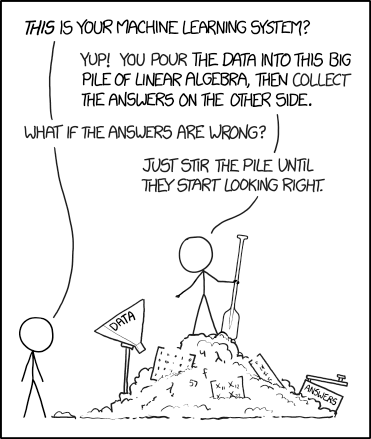

In [32]:
Image("https://imgs.xkcd.com/comics/machine_learning.png")

## Problem 3: Numpy warmup and Broadcasting

You should be able to complete both parts of this problem without using any *for* loops.

#### Numpy warmup exercises

Import the numpy package, then write a single line of Python that creates a variable **a** and binds it to a numpy array of integers with 5 rows and 4 columns, containing the integers 1 through 20 inclusive. Print the contents of the array.

In [33]:
import numpy as np
# your code here
a = (np.arange(1,21)).reshape(5,4)
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]]


In the same context (no need to import numpy again) create a variable **b** bound to an array containing the integers 1 through 5 inclusive, and print its contents.

In [34]:
# your code here
b = np.arange(1,6)
print(b)

[1 2 3 4 5]


Multiply the two arrays.

In [35]:
# your code here
a*b

ValueError: operands could not be broadcast together with shapes (5,4) (5,) 

Does the operation succeed? If not, why not? Enter your answer in the following cell.

>>The operation is not succesful, because the shapes of the two arrays are incompatible for broadcasting, specifically a has 5 rows and 4 columns, while b has 5 columns. We could either reshape a to 4 rows and 5 columns, or reshape b to 5 rows and 1 column in order to multiply them.

If the operation failed, write a line of code that modifies either **a** or **b** so that the two arrays can be multiplied, then multiply the arrays and print the results.

In [36]:
# your code here
a = a.reshape(4,5)
print(a*b)

[[  1   4   9  16  25]
 [  6  14  24  36  50]
 [ 11  24  39  56  75]
 [ 16  34  54  76 100]]


#### Broadcasting in action

Broadcasting lets us apply operations efficiently using arrays of different sizes -- in a way, it's an extension of the idea of applying a scalar (a single value) to all of the elements of an array. The latter idea is conceptually like "stretching" the scalar into an array of the same size as the existing array, then applying the operation element-wise to the two arrays. Broadcasting involves a set of rules that let Python "stretch" one array into the same size as another so that operations can be applied element-wise. Note that Python doesn't actually create the additional array entries; it just does this algorithmically behind the scenes. Also, broadcasting obeys certain rules,  described in the text and documentation, that determine whether it can be applied to any two given arrays.

Here's a chart showing the number of bicycle crossings for four New York City bridges in late April 2016:

| Date       | Brooklyn Bridge | Manhattan Bridge | Williamsburg Bridge | Queensboro Bridge | 
|------------|-----------------|------------------|---------------------|-------------------| 
| 2016-04-26 | 1997.0          | 3520             | 4559.0              | 2929.0            | 
| 2016-04-27 | 3343.0          | 5606             | 6577.0              | 4388.0            | 
| 2016-04-28 | 2486.0          | 4152             | 5336.0              | 3657.0            | 
| 2016-04-29 | 2375.0          | 4178             | 5053.0              | 3348.0            | 
| 2016-04-30 | 3199.0          | 4952             | 5675.0              | 3606.0            | 

(source: kaggle.com; https://donatstudios.com/CsvToMarkdownTable)

Let's represent this by a two-dimensional array, with rows containing counts by date, and columns containing counts by bridge (we'll omit the header row and date column for simplicity):

In [37]:
crossings = np.array([[ 1997.,  3520.,  4559.,  2929.],
       [ 3343.,  5606.,  6577.,  4388.],
       [ 2486.,  4152.,  5336.,  3657.],
       [ 2375.,  4178.,  5053.,  3348.],
       [ 3199.,  4952.,  5675.,  3606.]])
print(crossings)

[[1997. 3520. 4559. 2929.]
 [3343. 5606. 6577. 4388.]
 [2486. 4152. 5336. 3657.]
 [2375. 4178. 5053. 3348.]
 [3199. 4952. 5675. 3606.]]


We would like to know what percentage of each day's total bicycle crossings (of these four bridges) is represented by each bridge. This involves creating an array of the same size as the **crossings** array, where each element is a percentage of the total of the counts in that row of the original array.

Start by writing a line of Python that creates an array called **totals**, the entries of which are the totals in the five rows. Hint: Use the *axis* parameter of np.ndarray's *sum* method.

In [38]:
# Your code here
totals = np.sum(crossings, axis=1)
print(totals)

[13005. 19914. 15631. 14954. 17432.]


Combine the **crossings** and **totals** arrays to produce an array called **percents** containing the percentages represented by each element, as integers between 0 and 100 inclusive. Hint: these two arrays are not the same shape. (What shape are they?) Broadcasting is what allows Python to perform the element-wise operation(s) on the larger array.

In [63]:
# Your code  here
percents = (crossings / totals.reshape(5,1))*100
print(percents.astype(int))

[[15 27 35 22]
 [16 28 33 22]
 [15 26 34 23]
 [15 27 33 22]
 [18 28 32 20]]


## Problem 4: Matrix Multiplication (sorry, I took linear alegbra once)

I'm going to walk you through how to calculate the product of two matrices. Your goal is to make a function called matrixMultiplication(matrix1, matrix2) that performs matrix multiplication on two matrices. You can find out more information about matrix mulitplication here: https://www.mathsisfun.com/algebra/matrix-multiplying.html

Don't worry, I'm not going to make you learn matrix multiplication on your own. 

In [40]:
# We're going to need NumPy
import numpy as np

In [41]:
# Let's start with 2 matrices, mat1 and mat2
mat1 = np.array(range(1,7)).reshape(2,3)
print(mat1, "\n") # Should be a 2x3 matrix

mat2 = np.array(range(7,13)).reshape(3,2)
print(mat2) # Should be a 3x2 matrix 

[[1 2 3]
 [4 5 6]] 

[[ 7  8]
 [ 9 10]
 [11 12]]


#### Part 1: Find out how many rows and columns a matrix has

In order to do matrix multiplication, we need to make sure that the number of columns in matrix1 is the same as the number of rows in matrix2.

In the following cells, find the number of columns in mat1, and the number of rows in mat2.
<br><b>Hint: Use the .shape attribute</b>


In [42]:
# Find the number of cols in mat1
# Uncomment the below and complete!

mat1Cols = mat1.shape[1]
print(mat1Cols)

3


In [43]:
#Find the number of rows in mat2
# Uncomment the below and complete!

mat2Rows = mat2.shape[0]
print(mat2Rows)

3


#### Part 2: Make the matrix that will hold the product
Regardless of the shape of the two matrices we're multiplying, the result will be a matrix with the same # of rows from the first matrix and the same # of number of columns from the second matrix. 

In the following cell, make sure that the number of columns of the first matrix is the same as the number of rows of the second matrix, and then make a zero matrix whose dimensions are the # of rows from the first matrix and the # of number of columns from the second matrix.
<br><b>Hint: Use the .zeros() function, and have the numbers be integers</b>

In [44]:
#find the number of rows in mat1 (use .shape)
# Uncomment the below and complete! 

mat1Rows = mat1.shape[0]
print(mat1Rows)

#find the number of columns in mat2 (use .shape)
# Uncomment the below and complete! 

mat2Cols = mat2.shape[1]
print(mat2Cols)

# Uncomment the below and complete! 

if mat1Cols == mat2Rows:
#     # make a mat1Rows x mat2Cols with zeros (use .zeros())
   
    productMatrix = np.zeros((mat1Rows, mat2Cols), dtype=int)
    print(productMatrix) # this should be a 2x2 matrix

2
2
[[0 0]
 [0 0]]


#### Part 3: Calculating the dot product
Each element (i, j) of the product is the dot product of the ith row of the first matrix and the jth column of second matrix.
To calculate the dot product, you need to do the following:
<ol>
<li>Multiply the two arrays (Hint: Use .multiply( ) ) </li>
<li>Add the values of step 1 together (Hint: use .add.reduce( )) </li>
</ol>


It's easier to get a row from a matrix than a column, so let's <b> transpose </b> the second matrix. <br>
<b> Hint: Use .transpose() </b>

In [45]:
# Here is mat2
print(mat2, "\n")

# transpose mat2 and save it as mat2T
# Uncomment the below and complete! 

mat2T = np.transpose(mat2)
print(mat2T)

[[ 7  8]
 [ 9 10]
 [11 12]] 

[[ 7  9 11]
 [ 8 10 12]]


Notice that we basically just flipped the matrix. The first row of the transposed matrix was the first column of the original matrix, and the second row of the transposed matrix was the second column of the original matrix. 

Now we can start the matrix mulitplication.
The first element [0,0] of productMatrix is the dot product of the first row (row 0) of the first matrix and the first row (row 0) of the TRANSPOSED second matrix. 

The following cells will go over how to calculate the dot product.

In [46]:
# First, let's get the 2 rows that we need. 

# get the first row of mat1 (should be [1,2,3])
# Uncomment the below and complete! 

mat1_0 = mat1[0]
print(mat1_0)

# get the first row of mat2T (should be [7,9,11])
# Uncomment the below and complete! 

mat2T_0 = mat2T[0]
print(mat2T_0)


[1 2 3]
[ 7  9 11]


In [47]:
# multiply the 2 rows together using .multiply()
# the result should be [7, 18, 33]
# Uncomment the below and complete! 

mult = np.multiply(mat1_0,mat2T_0)
print(mult)

[ 7 18 33]


In [48]:
# add the values of the product above together using .add.reduce()
# the result should be 58
# Uncomment the below and complete! 

nDot = np.add.reduce(mult)
print(nDot)

58


Congrats, you calculated the dot product! This was the hardest part of this problem. Now, so you don't have to re-write this code, write a function called myDot(row1, row2) that takes 2 1-dimensional arrays and calculates the dot product as we did above. 

In [49]:
# Uncomment the below and complete! 

def myDot(row1,row2):
    # multiply the two rows
    mult = np.multiply(row1,row2)
    # add the values of the product together
    nDot = np.add.reduce(mult)
    # return the sum
    return nDot

# # Test it with mat1_0 and mat2T_0, you should get 58 again
print(myDot(mat1_0, mat2T_0))

58


#### Part 4: The Matrix Multiplication
You know how to calculate the dot product, so now all you have to do is fill in the values of the productMatrix. 
We already calculated the value that's going into [0,0]. NumpyArrays are mutable, so you can change the value using the following:

In [50]:
productMatrix[0,0] = nDot
print(productMatrix)

[[58  0]
 [ 0  0]]


To calculate the value that goes into [0,1], you need to find the dot product of the first row of the first matrix, and the second row of the transposed second matrix.

In [51]:
nDot2 = myDot(mat1[0], mat2T[1]) # remember that indexes start at 0
print(nDot2) # should be 64

64


..and so forth. In the following cell, iterate through each position of the productMatrix, and calculate the value that should go into each spot.
<br>Hints:
<ul>
<li> You'll need a nested loop </li>
<li> You'll want to keep track of what index you're on, so use enumerate! </li>
<ul>

In [52]:
# Uncomment the below and complete! 

for i,row in enumerate(mat1): # iterate over the first matrix
    for j,row in enumerate(mat2T): # iterate over the second matrix
        # replace each value of the productMatrix with the result of each dot product
        productMatrix[i,j] = myDot(mat1[i],mat2T[j]) 
print(productMatrix)

[[ 58  64]
 [139 154]]


#### Part 5: Make your function
Now that you have all the pieces, put them together to make the function matrixMultiplication(matrix1, matrix2).<br>
Here are the steps/requirements:
<ul>
<li> Check that the number of columns in matrix1 equals number of rows in matrix2</li>
<li> If not, raise a ValueError with any message you want and exit out (check out my section notes on 1/28 to see how to raise an error) </li>
<li> Make an square zero matrix called productMatrix that is the size of the number of rows of matrix1 and number of columns of matrix2 </li>
<li> Transpose matrix2, call it matrix2T </li>
<li> Iterate through each position of productMatrix and calculate the value that should go in it. You MUST use the myDot function that you created above </li>
<li> return the productMatrix </li>
</ul>


In [53]:
# Uncomment the below and complete! 

def matrixMultiplication(matrix1, matrix2):
    
    # check if dimensions are correct
    if matrix1.shape[1] != matrix2.shape[0]:
        raise ValueError("matrix1 columns must equal to matrix2 rows") 
        return
    else:                        
    # make product matris
        matrix1Rows = matrix1.shape[0]
        matrix2Cols = matrix2.shape[1]
        productMatrix = np.zeros((matrix1Rows, matrix2Cols), dtype =int) 
    # transpose matrix2
        matrix2T = np.transpose(matrix2)
    # iterate through productMatrix and find values
    for i,row in enumerate(matrix1):
        for j,row in enumerate(matrix2T):
            productMatrix[i,j] = myDot(matrix1[i],matrix2T[j]) 
    return productMatrix
    #return(productMatrix)  

In [54]:
matrixMultiplication(mat1,mat2)

array([[ 58,  64],
       [139, 154]])

#### Part 6: Testing
Congrats, you made a function that can perform matrix multiplication! Fun fact, NumPy already has a function that does this for us called .dot(). We can test our solution by comparing it to NumPy's .dot() solution

In [55]:
np.dot(mat1,mat2) # this should be the same as the result that we calculated

array([[ 58,  64],
       [139, 154]])

You should always test your code. In the following few cells, I will provide matrices to multiply. 

In [56]:
# This test should pass. We should have a 2x2 matrix

test1 = np.array(range(3,13), int).reshape(2,5)
test2 = np.array(range(10,20), int).reshape(5,2)

print(matrixMultiplication(test1,test2), "\n")
print(np.dot(test1,test2))

[[370 395]
 [720 770]] 

[[370 395]
 [720 770]]


In [57]:
# This test should pass. We should have a 2x2 matrix

test1 = np.array(range(3,9), int).reshape(2,3)
test2 = np.array(range(10,16), int).reshape(3,2)

print(matrixMultiplication(test1,test2), "\n")
print(np.dot(test1,test2))

[[148 160]
 [256 277]] 

[[148 160]
 [256 277]]


In [58]:
# This should return an error 

test1 = np.array(range(5,15), int).reshape(5,2)
test2 = np.array(range(30,40), int).reshape(5,2)

print(matrixMultiplication(test1,test2), "\n")
print(np.dot(test1,test2))

ValueError: matrix1 columns must equal to matrix2 rows

In [59]:
# This test should pass. We should have a 3x5 matrix

test1 = np.array(range(3,9), int).reshape(3,2)
test2 = np.array(range(10,20), int).reshape(2,5)

print(matrixMultiplication(test1,test2), "\n")
print(np.dot(test1,test2))

[[ 90  97 104 111 118]
 [140 151 162 173 184]
 [190 205 220 235 250]] 

[[ 90  97 104 111 118]
 [140 151 162 173 184]
 [190 205 220 235 250]]
